# Linear Regression


<center><img src="Title.png" alt="Drawing" style="width: 900px; height: 330px;" /></center>

<div style="text-align: right"> 
  <small>slidesgo.com</small>
</div>


## Learning Objectives

1. [Introduction to Linear Regression](#Introduction-to-Linear-Regression)
2. [Simple Linear Regression](#Simple-Linear-Regression)
3. [Fitting an optimal model](#Fitting-an-optimal-model)
4. [Introduction to scikit-learn](#Introduction-to-scikit-learn)
5. [Multiple Linear Regression](#Multiple-Linear-Regression)
6. [Model assessment and cross-validation](#Model-assessment-and-cross-validation)





## Introduction to Linear Regression

Linear regression is a statistical method that uses a linear model to predict the value of a dependent variable from one or more independent variables. It models the relationship between variables by fitting a straight line to observed data.

There are two sets of variables involved: the independent variable(s) or predictor variables, and the dependent variable or the target variable being predicted.

The simplest way to express a linear model is through the equation of a straight line.


$$  y = mx + c $$



<center><img src="https://www.vedantu.com/question-sets/6b976ac3-1d2e-4208-a20b-ee09f23dc7a96153612254649760548.png" alt="Drawing" style="width: 350px; height: 230px;" /></center>

<div style="text-align: right"> 
  <small>www.vedantu.com</small>
</div>




where:

`y` is the dependent variable

`m` is the slope of the line

`c` is the y-intercept

`x` is the independent variable



### Why linear regression?

The linear regression model is the most fundamental machine learning model. Simply put, in a dataset, if a set of variables are related by a linear relationship, this relationship can be expressed in terms of a straight line, and predictions can be made for unseen data using it. For example, using Linear Regression (LR), you can predict the price of a house based on its square footage and the number of bedrooms.


There are two main types of LR models we are going to discuss are: `simple linear regression` and `Multiple linear regression`.

`Simple linear regression` : Simple linear regression is used when there is one independent variable. For example, we could use simple linear regression to predict the price of a house based on its square footage.



`Multiple linear regression`: Multiple linear regression is used when there are multiple independent variables. For example, we could use multiple linear regression to predict the sales of a product based on its price, advertising budget, and competition.



Let's start with `Simple linear regression`



## Simple Linear Regression

#### Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read Data File

In [3]:
data = pd.read_csv('LR_1D_data.csv')

data.head()
data.shape

(100, 2)

#### Visualize data

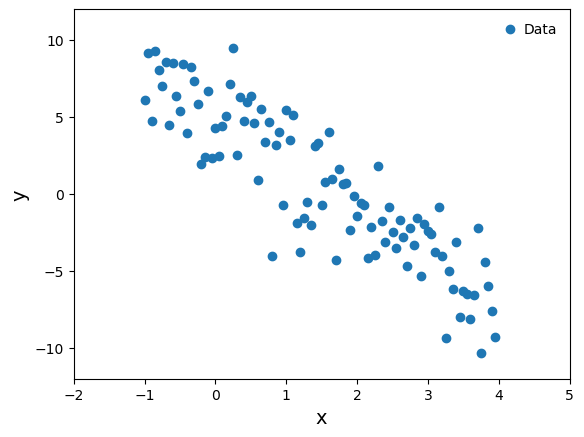

In [11]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)
plt.legend(frameon=False, handletextpad=0, fontsize=10)

We can clearly see a linear relationship in the scatterplot. The question is, can we find a line that best fits the data?

Two primary questions remain: 

(1) How to calculate the straight line? 

(2) How do we know if our straight line is good enough?

First, let's try to write a function that can find the straight line.

#### Arbitrary model

In [28]:
def lr_1d_model(w_cap_vec, x_vec=data["x"]):
    w0_cap = w_cap_vec[0] # the `c` in from the staright line equation
    w1_cap = w_cap_vec[1] # the `m` in from the staright line equation
    
    # Model prediction
    pred = w1_cap*x_vec + w0_cap
    return pred

In [29]:
w_cap_arb_vec = [4, -2] # We are choosing an arbitrary value.
y_cap_arb_vec = lr_1d_model(w_cap_arb_vec)
y_cap_arb_vec

0     6.0
1     5.9
2     5.8
3     5.7
4     5.6
     ... 
95   -3.5
96   -3.6
97   -3.7
98   -3.8
99   -3.9
Name: x, Length: 100, dtype: float64

#### Let's see how the staright line looks

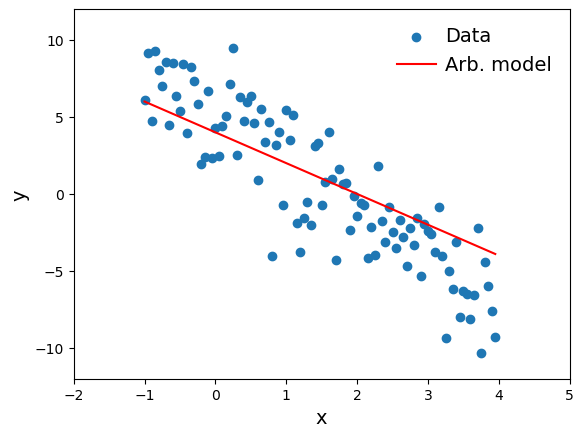

In [18]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

Not bad! But how do we know it's the best one we can achieve?

We need a metric that measures how good our fit is. `MSE (Mean Squared Error)` is one such metric that is extensively used with linear regression models.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In this formula:

$n$ is the number of data points.

$y_i$  is the actual observed value.

$\hat{y}_i$  is the predicted value for the  i-th data point.



In [7]:
error = data['y'] - y_cap_arb_vec
error

0    -1.929264
1     1.220318
2    -3.074603
3     1.567612
4     0.420143
        ...   
95   -8.855203
96   -2.828707
97   -4.305354
98   -5.809459
99   -7.404869
Length: 100, dtype: float64

In [8]:
mse = np.mean(np.square(error)) # Using numpy to calculate the MSE
print("Mean square error (MSE): %.2f units" %mse)  #Loss Function, Objective Function, and 

Mean square error (MSE): 13.36 units


## Fitting an optimal model


One way to fit the data to the staright line  is by using `least squares method`

Let's say we have a dataset with $n$ data points, where $x_i$ represents the independent variable, and $y_i$ represents the target variable. We want to find a linear model $$y = mx + c$$ that best fits the data.


The least squares method aims to minimize the sum of squared differences between the observed data points $y_i$ and the corresponding values predicted by the linear model $mx_i + c$. This is formulated as the following optimization problem:

$$\text{Minimize } \sum_{i=1}^{n} (y_i - mx_i - c)^2 $$

To find the optimal values of $m$ and $c$ that minimize the above expression, we can take partial derivatives with respect to $m$ and $c$, set them to zero, and solve for $m$ and $c$. The solutions are given by:

$$ m = \frac{n\sum_{i=1}^{n} x_i y_i - \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{n\sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2} $$

$$ m = \frac{\sum (y_i - \bar{y})(x_{i}-\bar{x})}{\sum(x_{i}-\bar{x})^2} $$

$$ c = \frac{\sum_{i=1}^{n} y_i - m\sum_{i=1}^{n} x_i}{n} $$

$$ c = \bar{y} - m*\bar{x} $$

These values of $m$ and $c$ provide the best-fitting line for our data.

For more examples see the [website](https://www.brainkart.com/article/Method-of-Least-Squares_39255/).


Now, let us compute the optimal paramaters using `least squares method` that gives the best fit and least `MSE` error



#### Params of optimal 1D model

In [21]:
y_avg = np.mean(data['y'])
x_avg = np.mean(data['x'])
y_avg

0.57798316283537

In [8]:
w1_cap_num = np.sum((data['y'] - y_avg) * (data['x'] - x_avg))
w1_cap_den = np.sum((data['x'] - x_avg) ** 2)
w1_cap = w1_cap_num/w1_cap_den
w1_cap

-3.0316709962204405

In [10]:
w0_cap = y_avg - w1_cap * x_avg
w0_cap

5.049697882260526

In [11]:
print("Optimal model parameters are:")
print("w0_cap: %.3f" %w0_cap)
print("w1_cap: %.3f" %w1_cap)

Optimal model parameters are:
w0_cap: 5.050
w1_cap: -3.032


#### Let's Visualize optimal model

In [12]:
w_cap_vec = [w0_cap, w1_cap]
y_cap_vec = lr_1d_model(w_cap_vec)

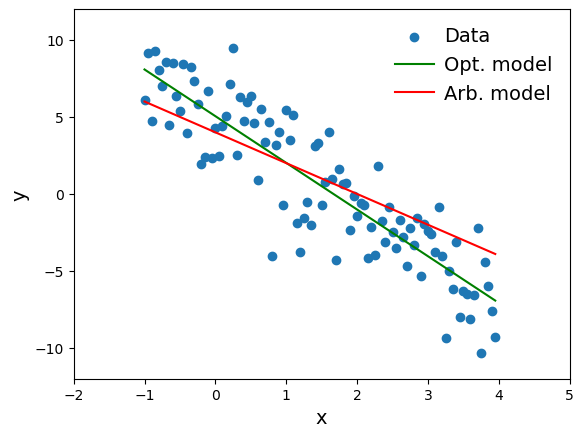

In [13]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

In [15]:
error = data['y'] - y_cap_vec
mse = np.mean(np.square(error))
print("Mean square error (MSE): %.2f units" %mse)

Mean square error (MSE): 5.03 units


The mean square error is much less than that of the arbitrary model.

#### Make prediction for new data

In [14]:
new_x_vec = np.array([-1.8,-1.4,4.3,4.6])

In [15]:
new_y_cap_pred_vec = lr_1d_model(w_cap_vec=w_cap_vec, x_vec=new_x_vec)

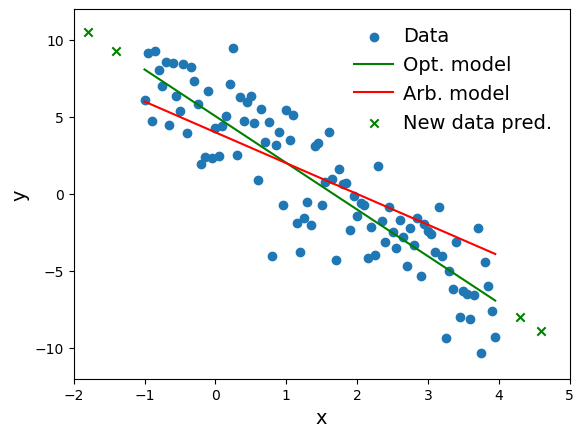

In [16]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.scatter(new_x_vec, new_y_cap_pred_vec, c='g', marker='x', label='New data pred.')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

## Introduction to scikit-learn

`scikit-learn`, also known as sklearn, is a popular Python library for machine learning. It provides simple and efficient tools for data analysis and modeling. See [documentation](https://scikit-learn.org/stable/).


#### Import scikit-learn:















In [23]:
import sklearn

#### Load a Dataset:
Scikit-learn provides various datasets for practice. You can load a dataset like this:

In [18]:
from sklearn import datasets
dataset = datasets.load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
#dataset.data

#### Split Data:
For supervised learning, split your data into training and testing sets:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

This function randomly splits the dataset into training and testing parts. In machine learning models, one part is used for training the model, and the other is used for testing it on unseen data. See [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details.

#### Selecting a default Linear regression model 

There are many machine learning library packages available within scikit-learn. `LinearRegression` is one of them. See [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Also there are many error metrics available apart from `MSE`. One of the most commonly used metrics is the `R2` score. See [this](https://scikit-learn.org/stable/modules/model_evaluation.html) for more details. We can write Python code for computing these metrics and even linear regression like we did before, but these are already implemented in the scikit-learn library. So, we will just import and use it.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # A dataset we create

X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [35]:
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3  #We know the solution so we can generate the target 

lr = LinearRegression() # Instantiate


reg = lr.fit(X, y)   # Use of LinearRegression
reg.score(X, y)    # This Basically gives you R2 score

1.0

In [36]:
reg.coef_  # We can always look at the coefficients. I.e., m from the staright line equation

array([1., 2.])

Remember, we have two coefficients because X has two columns, and this is a `Multiple Linear Regression` example

In [37]:
reg.intercept_  # Intercept

3.0000000000000018

In [38]:
reg.predict(np.array([[3, 5]]))  # predicting on new data

array([16.])

## Multiple Linear Regression

Multiple Linear Regression is an extension of Simple Linear Regression, allowing us to model the relationship between a dependent variable and multiple independent variables.

Imagine you have a dataset with a dependent variable (e.g., house price) and several independent variables (e.g., square footage, number of bedrooms, and neighborhood) that can influence the dependent variable.

In Multiple Linear Regression, we represent the relationship between the dependent variable (Y) and multiple independent variables (X1, X2, X3, ... Xn) using the following equation:

$$ Y = \beta_0 + \beta_1*X1 + \beta_2*X2 + \beta_3*X3 + ... + \beta_n*Xn + \epsilon  $$

- $Y$ is the dependent variable.
- $X1, X2, X3, ... Xn$ are the independent variables.
- $\beta_0$ is the intercept (the value of Y when all Xs are zero).
- $\beta_1, \beta_2, \beta_3, ... \beta_n$ are the coefficients (how much each X affects Y).
- $\epsilon$ represents the error term (unexplained variance).


The solution of `Multiple linear regression` involves an optimization process (similar to Simple Linear Regression) and the reduction of the objective function, such as the `R2` score. `Gradient descent` is the most commonly used optimization technique to solve this problem and obtain the coefficients.




Let's solve a linear regression problem on a materials dataset

In [28]:
import pandas as pd  # To play with data tables
import matplotlib.pyplot as plt  # To visualize data
import numpy as np
import copy

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load train data table

In [64]:
data = pd.read_csv('K_VRH.csv')
data.head()

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,K_VRH
0,18.0,95.666667,40.598269,74.263333,17.333333,2.666667,76.666667,3.653333,2.0,5.333333,...,0.0,0.666667,0.0,0.0,0.666667,18.491667,3.8250,0.0,85.000,42.0
1,17.8,64.300000,39.374732,158.536000,11.800000,3.000000,110.700000,2.815000,1.7,3.100000,...,0.3,1.100000,0.0,0.0,1.400000,33.165417,1.1820,0.0,84.100,15.0
2,23.0,88.625000,54.161302,132.550000,16.000000,2.875000,76.625000,3.480000,2.0,4.000000,...,0.0,1.250000,0.0,0.0,1.250000,14.595948,1.4775,0.0,49.625,3.0
3,10.0,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.0,3.000000,...,0.0,3.000000,0.0,0.0,3.000000,17.694308,4.6325,0.0,122.000,145.0
4,8.4,69.000000,16.998934,119.664000,12.800000,2.200000,87.000000,2.858000,1.8,3.000000,...,0.2,1.800000,0.0,0.0,2.000000,14.265417,1.2874,0.0,91.800,27.0


The dataset contains material properties that correspond to various factors, such as their location in the periodic table, mass, etc., and the target is to predict the bulk modulus. The properties are derived from Material Agnostic Platform for Informatics and Exploration`Magpie` descriptor for materials.

In [65]:
data = data.sample(frac=1) # Shuffling the rows

In [58]:
#data

#### Separate X and y data

In [66]:
Xcols = data.columns[:-1]
#Xcols
X = data[Xcols]

X.head()

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NValence,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber
315,82.00,54.000000,205.483892,1464.247500,9.000000,6.250000,152.000000,2.280000,1.25,0.000000,...,20.000000,0.75,0.000000,2.25,3.000000,6.00,18.820000,0.000,0.000000,203.500000
183,44.25,42.000000,102.475000,919.110000,7.250000,5.000000,165.750000,1.383750,2.00,0.000000,...,8.250000,0.00,0.000000,0.00,2.250000,2.25,27.650625,0.000,0.000000,201.750000
432,41.25,36.000000,97.137206,2048.762500,6.250000,4.750000,155.000000,1.780000,1.50,0.000000,...,9.750000,0.00,0.000000,5.25,0.000000,5.25,18.272500,0.000,0.000003,209.500000
91,12.00,73.625000,25.004500,634.875000,11.250000,2.625000,98.875000,2.698750,2.00,2.500000,...,5.000000,0.00,1.250000,2.00,0.000000,3.25,12.724375,0.000,0.000006,80.250000
414,26.00,57.833333,59.557822,1938.166667,9.333333,3.666667,123.333333,1.821667,2.00,0.333333,...,7.333333,0.00,1.666667,1.50,0.833333,4.00,12.802778,0.508,0.774236,184.666667


In [67]:
X.shape

(479, 22)

In [74]:
X.to_numpy()[:,0]

array([82.        , 44.25      , 41.25      , 12.        , 26.        ,
       36.        , 66.        , 25.6       , 19.        , 16.        ,
       43.75      , 15.27272727, 59.8       , 37.2       , 53.        ,
       20.5       , 54.33333333,  8.66666667, 41.75      ,  7.33333333,
       27.75      , 49.4       , 17.8       , 20.        , 15.66666667,
       28.28571429, 21.6       , 53.25      , 59.2       , 14.33333333,
       31.25      , 32.25      , 53.        , 22.85714286, 20.        ,
       65.5       , 42.        , 38.        , 23.2       , 67.5       ,
       59.        , 40.5       , 39.        , 73.5       , 48.33333333,
       40.        , 36.75      , 27.66666667, 63.        , 74.        ,
       37.25      , 33.2       , 25.75      , 19.5       , 22.66666667,
       16.        , 21.66666667, 45.        ,  4.57142857, 50.8       ,
       30.8       , 24.4       ,  8.85714286, 32.33333333, 49.75      ,
       69.25      , 39.33333333, 20.4       , 39.33333333, 13.75

In [75]:
X.values[:,0]

array([82.        , 44.25      , 41.25      , 12.        , 26.        ,
       36.        , 66.        , 25.6       , 19.        , 16.        ,
       43.75      , 15.27272727, 59.8       , 37.2       , 53.        ,
       20.5       , 54.33333333,  8.66666667, 41.75      ,  7.33333333,
       27.75      , 49.4       , 17.8       , 20.        , 15.66666667,
       28.28571429, 21.6       , 53.25      , 59.2       , 14.33333333,
       31.25      , 32.25      , 53.        , 22.85714286, 20.        ,
       65.5       , 42.        , 38.        , 23.2       , 67.5       ,
       59.        , 40.5       , 39.        , 73.5       , 48.33333333,
       40.        , 36.75      , 27.66666667, 63.        , 74.        ,
       37.25      , 33.2       , 25.75      , 19.5       , 22.66666667,
       16.        , 21.66666667, 45.        ,  4.57142857, 50.8       ,
       30.8       , 24.4       ,  8.85714286, 32.33333333, 49.75      ,
       69.25      , 39.33333333, 20.4       , 39.33333333, 13.75

Total number of variable are 22 in our data and they are

In [82]:
X.columns

Index(['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 'Column',
       'Row', 'CovalentRadius', 'Electronegativity', 'NsValence', 'NpValence',
       'NdValence', 'NfValence', 'NValence', 'NsUnfilled', 'NpUnfilled',
       'NdUnfilled', 'NfUnfilled', 'NUnfilled', 'GSvolume_pa', 'GSbandgap',
       'GSmagmom', 'SpaceGroupNumber'],
      dtype='object')

In [83]:
y = data['K_VRH']  # The Bulk modulus
y

315    126.0
183     42.0
432    136.0
91     162.0
414    209.0
       ...  
33      36.0
379    133.0
235    127.0
366     84.0
61      49.0
Name: K_VRH, Length: 479, dtype: float64

#### Visualize data

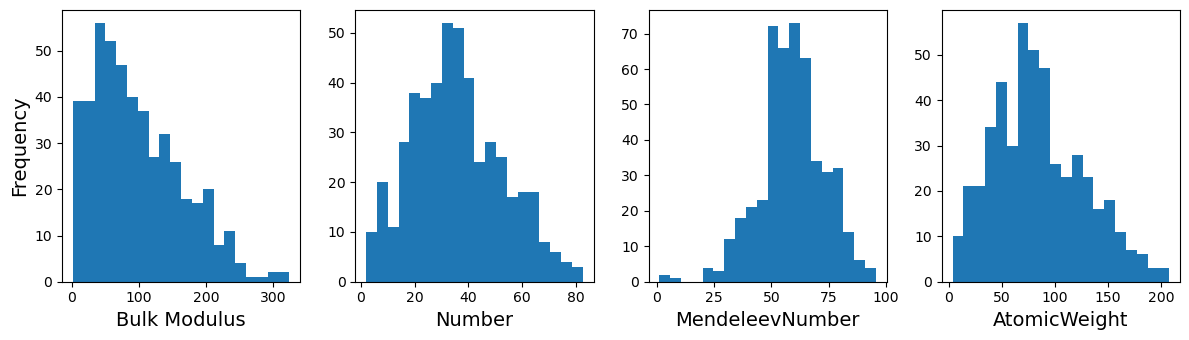

In [88]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))

ax1.hist(y.to_numpy(), bins=20)
ax2.hist(X.to_numpy()[:,0], bins=20, label=Xcols[0])
ax3.hist(X.to_numpy()[:,1], bins=20, label=Xcols[1])
ax4.hist(X.to_numpy()[:,2], bins=20, label=Xcols[2])

ax1.set_xlabel('Bulk Modulus', fontsize=14)
ax2.set_xlabel(Xcols[0], fontsize=14)
ax3.set_xlabel(Xcols[1], fontsize=14)
ax4.set_xlabel(Xcols[2], fontsize=14)

ax1.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()

In [86]:
X.values[:,0]

array([82.        , 44.25      , 41.25      , 12.        , 26.        ,
       36.        , 66.        , 25.6       , 19.        , 16.        ,
       43.75      , 15.27272727, 59.8       , 37.2       , 53.        ,
       20.5       , 54.33333333,  8.66666667, 41.75      ,  7.33333333,
       27.75      , 49.4       , 17.8       , 20.        , 15.66666667,
       28.28571429, 21.6       , 53.25      , 59.2       , 14.33333333,
       31.25      , 32.25      , 53.        , 22.85714286, 20.        ,
       65.5       , 42.        , 38.        , 23.2       , 67.5       ,
       59.        , 40.5       , 39.        , 73.5       , 48.33333333,
       40.        , 36.75      , 27.66666667, 63.        , 74.        ,
       37.25      , 33.2       , 25.75      , 19.5       , 22.66666667,
       16.        , 21.66666667, 45.        ,  4.57142857, 50.8       ,
       30.8       , 24.4       ,  8.85714286, 32.33333333, 49.75      ,
       69.25      , 39.33333333, 20.4       , 39.33333333, 13.75

#### Train an ML model

We need something to visualize the performance of our model using a parity plot (similar to the scatterplots you have seen before). It is, therefore, convenient to have a function that will handle the plotting. We will use matplotlib to write this function

In [89]:
# First we will define function to make plots. This will make the code simpler.

def plot_parity(y_cv_test,y_pred_test, y_cv_train=None,y_pred_train=None, label=None, ylim=[0,500]):
    """
    Function to make parity plots.
    """
    
    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
    r2_test = r2_score(y_cv_test,y_pred_test)
    
    if y_cv_train is None:
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4), sharey=True, sharex=True)
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
        
    ax1.scatter(y_cv_test,y_pred_test)
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "RMSE: %.2f"%rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f"%r2_test, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot(ylim, ylim, '--k')
    ax1.set_xlabel('True y', fontsize=14)
    ax1.set_ylabel('Pred y', fontsize=14)
    ax1.set_xlim(ylim[0],ylim[1])
    ax1.set_ylim(ylim[0],ylim[1])    
    
    if y_cv_train is not None: 
        rmse_train = np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
        r2_train = r2_score(y_cv_train,y_pred_train)
        
        ax2.scatter(y_cv_train,y_pred_train, c='m')
        ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)        
        ax2.text(0.95, 0.18, "RMSE: %.2f"%rmse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
        ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
        ax2.plot(ylim, ylim, '--k')

        ax2.set_xlabel('True y', fontsize=14)    
        ax2.set_xlim(ylim[0],ylim[1])
        ax2.set_ylim(ylim[0],ylim[1])    

    plt.tight_layout()
    plt.show()
    
    return None

In [90]:
#Train
import copy

lr = LinearRegression(fit_intercept=False) #Note that the intercept is False. We don't want the model to account for any intercept. 
model = lr.fit(X,y)
lr_model = copy.deepcopy(model)

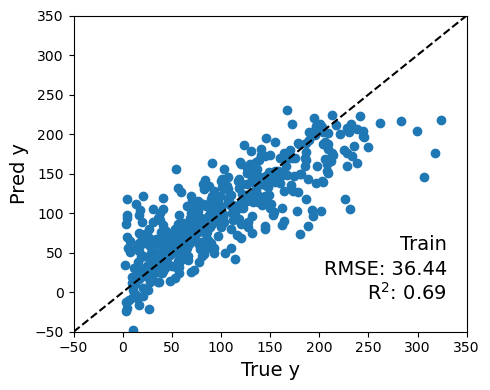

In [46]:
y_pred = model.predict(X)
plot_parity(y,y_pred, label="Train", ylim=[-50,350])

Let's look at the coefficients

In [47]:
print("Sklearn model: ", lr_model.coef_)

Sklearn model:  [-1.83176010e+01 -2.56584021e-01  4.96026077e+00  5.59245630e-02
  2.81547410e+00  1.30463259e+02 -2.09290423e+00  2.52865787e+01
  1.10286066e+01 -1.82206049e+01 -5.70825743e-01  4.44176616e+00
 -3.32105781e+00  1.61311418e+01 -2.07611127e+00 -1.72032208e+00
 -6.55961348e+00  5.77509497e+00 -8.73128266e-01  8.74994880e-03
  1.31903504e+01 -1.31421887e-01]


In [48]:
len( lr_model.coef_)

22

We have a total of 22 coefficients, which is equal to the number of variables we have in our data.

## Model assessment and cross validation


***Model assessment*** is a critical step in machine learning where we evaluate the performance of our predictive models. The goal is to understand how well a model generalizes to unseen data and whether it is effectively capturing patterns in the training data.

Common metrics for model assessment include `Mean Squared Error (MSE)`, `Root Mean Squared Error (RMSE)`, `Mean Absolute Error (MAE)`, and `R-squared` $(R^2)$. These metrics help quantify the accuracy and reliability of our model's predictions.

***Cross-validation***, Cross-validation is a powerful technique for assessing a model's performance while efficiently utilizing available data. By evaluating a model on various subsets, we can determine its ability to perform well on unseen data. Cross-validation also aids in selecting the best-performing model or hyperparameters. This process involves systematically splitting the dataset into training and testing sets. There are several types of cross-validation techniques available

- K-fold cross-validation
- Hold-out cross-validation
- Stratified k-fold cross-validation
- Leave-p-out cross-validation
- Leave-one-out cross-validation
- Monte Carlo (shuffle-split)
- Time series (rolling cross-validation)


One of the most widely used methods is k-fold cross-validation, where the data is divided into k equally sized parts. The model is trained on k-1 of these parts and tested on the remaining part. This process is repeated k times, ensuring that each data point is used for testing exactly once.


<center><img src="https://d2mk45aasx86xg.cloudfront.net/image5_11zon_af97fe4b03.webp" alt="Drawing" style="width: 800px; height: 330px;" /></center>

<div style="text-align: right"> 
  <small>www.turing.com</small>
</div>

For more details on other types of cross-validation, see [here](https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations).


scikit-learn has its own K-fold cross-validation implemented in the `KFold` function. See [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [93]:
from sklearn.model_selection import KFold

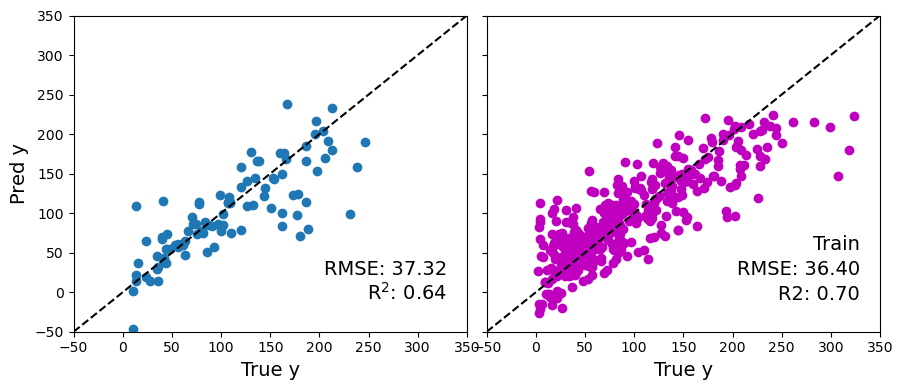

Root mean squared error: 37.32
Coefficient of determination: 0.64


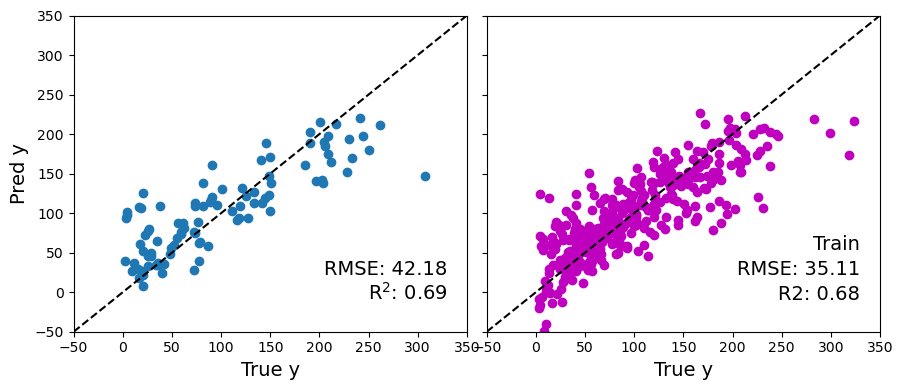

Root mean squared error: 42.18
Coefficient of determination: 0.69


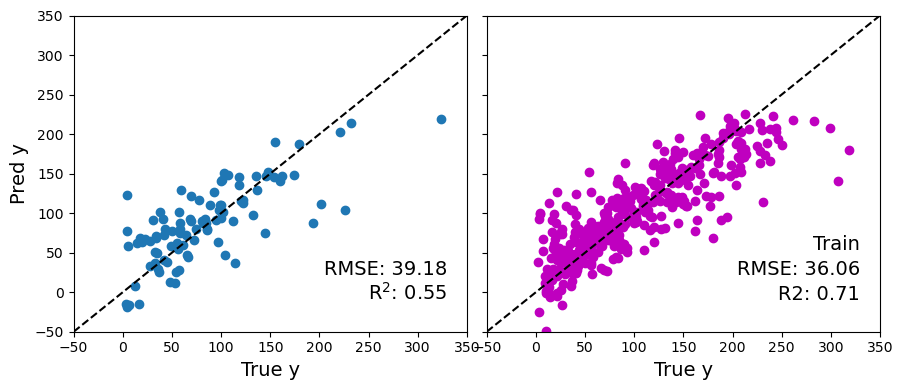

Root mean squared error: 39.18
Coefficient of determination: 0.55


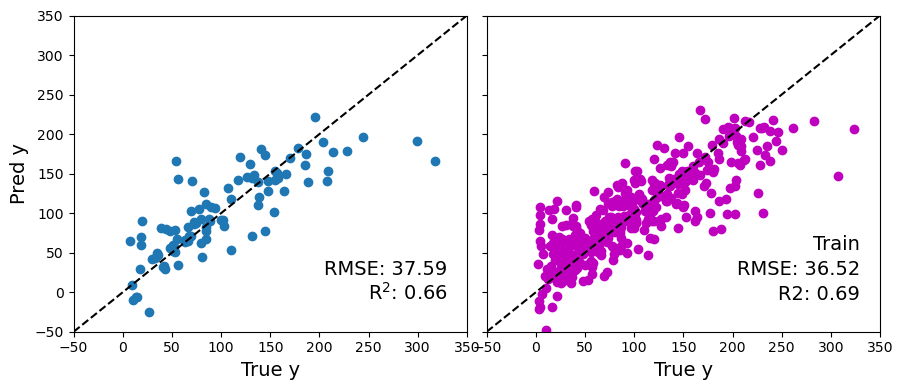

Root mean squared error: 37.59
Coefficient of determination: 0.66


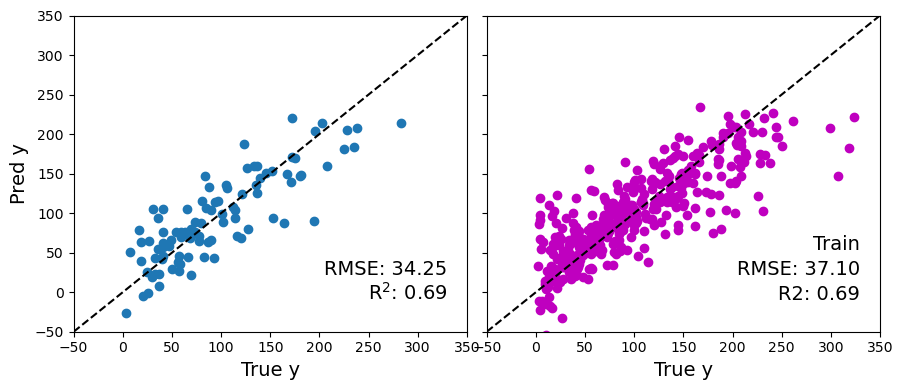

Root mean squared error: 34.25
Coefficient of determination: 0.69


In [108]:
kf = KFold(n_splits=5)

errors = []

for idx, (train, test) in enumerate(kf.split(X)):
   # print(idx, train, test)
    X_cv_train = X.values[train]
    X_cv_test = X.values[test]

    y_cv_train = y.values[train]
    y_cv_test = y.values[test]
    
    
    # Model fit and prediction
    model = lr.fit(X_cv_train,y_cv_train)
    y_pred_test = model.predict(X_cv_test)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    rmse_test = np.sqrt(mean_squared_error(y_cv_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))

    r2_test = r2_score(y_cv_test, y_pred_test)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    plot_parity(y_cv_test,y_pred_test, y_cv_train,y_pred_train,ylim=[-50,350])

    print("Root mean squared error: %.2f" % rmse_test)
    print("Coefficient of determination: %.2f" % r2_test) 
    
    error = {'kfold': idx+1,
             'rmse_train': rmse_train,
             'r2_train': r2_train,             
             'rmse_test': rmse_test,
             'r2_test': r2_test
            }

    errors.append(error)

In [105]:
list(kf.split(X))

[(array([240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
         253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
         266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
         279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
         292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
         305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
         318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
         331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
         344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
         357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
         370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
         383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
         396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
         409, 410, 411, 412, 413, 414,

In [97]:
errors = pd.DataFrame(errors)
errors

,kfold,rmse_train,r2_train,rmse_test,r2_test
0,1,36.397822,0.695952,37.320119,0.638617
1,2,35.114635,0.684312,42.176897,0.692292
2,3,36.059035,0.706699,39.180432,0.553429
3,4,36.518950,0.689820,37.587980,0.664296
4,5,37.103782,0.687306,34.246774,0.690992


### Question
4. Why error on training set is consistently lower than that on validation set?
5. Further, the errors on various validation sets are also different. Which is the correct value that best *estimate* the performance of the ML model? 

In [45]:
errors[['rmse_test','r2_test']].mean()

rmse_test    38.257398
r2_test       0.656720
dtype: float64